In [32]:
!pip install bs4 

In [36]:
!pip install selenium

   ---------------------------------------- 0.0/9.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.4 MB 1.3 MB/s eta 0:00:08
   ---------------------------------------- 0.0/9.4 MB 653.6 kB/s eta 0:00:15
   ---------------------------------------- 0.1/9.4 MB 744.7 kB/s eta 0:00:13
   ---------------------------------------- 0.1/9.4 MB 819.2 kB/s eta 0:00:12
    --------------------------------------- 0.2/9.4 MB 762.6 kB/s eta 0:00:13
    --------------------------------------- 0.2/9.4 MB 784.3 kB/s eta 0:00:12
    --------------------------------------- 0.2/9.4 MB 808.4 kB/s eta 0:00:12
   - -------------------------------------- 0.3/9.4 MB 850.6 kB/s eta 0:00:11
   - -------------------------------------- 0.3/9.4 MB 791.9 kB/s eta 0:00:12
   - -------------------------------------- 0.3/9.4 MB 776.5 kB/s eta 0:00:12
   - -------------------------------------- 0.4/9.4 MB 764.2 kB/s eta 0:00:12
   - -------------------------------------- 0.4/9.4 MB 757.8 kB/s eta 0:00:

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
streamlit 1.32.0 requires packaging<24,>=16.8, but you have packaging 24.1 which is incompatible.


In [ ]:
pip install webdriver-manager


Note: you may need to restart the kernel to use updated packages.


In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd
import time
from webdriver_manager.chrome import ChromeDriverManager

chrome_options = Options()
chrome_options.add_argument("--start-maximized")
chrome_options.add_argument("--disable-blink-features=AutomationControlled")
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=chrome_options)

base_url = "https://www.jiomart.com/search/laptop?prod_mart_master_vertical%5Bpage%5D={page}&prod_mart_master_vertical%5BhierarchicalMenu%5D%5Bcategory_tree.level0%5D%5B0%5D=Category"

product_links = []
max_products = 300  

page = 1
while len(product_links) < max_products:
    driver.get(base_url.format(page=page))

    try:
        WebDriverWait(driver, 10).until(
            EC.presence_of_all_elements_located((By.XPATH, "//a[contains(@href, '/p/')]"))
        )
    except:
        print(f"No products found on page {page}. Stopping.")
        break

    last_height = driver.execute_script("return document.body.scrollHeight")
    while True:
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(1.5)
        new_height = driver.execute_script("return document.body.scrollHeight")
        if new_height == last_height:
            break
        last_height = new_height

    products = driver.find_elements(By.XPATH, "//a[contains(@href, '/p/')]")
    page_links = [p.get_attribute("href") for p in products if p.get_attribute("href")]
    page_links = list(set(page_links))  

    product_links.extend(page_links)
    product_links = list(set(product_links))  
    print(f"Page {page}: Total unique so far = {len(product_links)}")

    if len(product_links) >= max_products:
        break

    page += 1
    time.sleep(2)

product_links = product_links[:max_products]
print(f"Total unique products collected: {len(product_links)}")

all_data = []
all_columns = set()

for i, link in enumerate(product_links, start=1):
    driver.get(link)
    time.sleep(2)

    product_data = {}

    try:
        title = driver.find_element(By.CSS_SELECTOR, "div#pdp_product_name").text.strip()
        product_data["Title"] = title
    except:
        product_data["Title"] = ""

    try:
        price_div = driver.find_element(By.CSS_SELECTOR, "div.product-price.jm-mb-xxs")
        product_data["Price"] = price_div.text.strip().split('\n')[0]  
    except:
        product_data["Price"] = ""


    try:
        key_features_section = driver.find_element(By.CSS_SELECTOR, "section.product-key-features")
        features = key_features_section.find_elements(By.TAG_NAME, "li")
        for f in features:
            if ":" in f.text:
                key, value = f.text.split(":", 1)
                product_data[key.strip()] = value.strip()
                all_columns.add(key.strip())
    except:
        pass

    try:
        specs_section = driver.find_element(By.CSS_SELECTOR, "section.product-specifications")
        labels = specs_section.find_elements(By.CSS_SELECTOR, ".product-specs-label")
        values = specs_section.find_elements(By.CSS_SELECTOR, ".product-specs-value")

        for lbl, val in zip(labels, values):
            key = lbl.text.strip()
            value = val.text.strip()
            product_data[key] = value
            all_columns.add(key)
    except:
        pass

    all_data.append(product_data)
    print(f"Scraped product {i}/{len(product_links)}")

df = pd.DataFrame(all_data)

for col in all_columns:
    if col not in df.columns:
        df[col] = ""
df.to_csv("jiomart_laptops_new.csv", index=False, encoding="utf-8-sig")

driver.quit()
print("Scraping completed. Saved to jiomart_laptops.csv")




Page 1: Total unique so far = 12
Page 2: Total unique so far = 24
Page 3: Total unique so far = 36
Page 4: Total unique so far = 48
Page 5: Total unique so far = 60
Page 6: Total unique so far = 72
Page 7: Total unique so far = 84
Page 8: Total unique so far = 96
Page 9: Total unique so far = 108
Page 10: Total unique so far = 120
Page 11: Total unique so far = 132
Page 12: Total unique so far = 144
Page 13: Total unique so far = 156
Page 14: Total unique so far = 168
Page 15: Total unique so far = 180
Page 16: Total unique so far = 192
Page 17: Total unique so far = 204
Page 18: Total unique so far = 216
Page 19: Total unique so far = 228
Page 20: Total unique so far = 240
Page 21: Total unique so far = 252
Page 22: Total unique so far = 264
Page 23: Total unique so far = 276
Page 24: Total unique so far = 288
Page 25: Total unique so far = 300
Total unique products collected: 300
Scraped product 1/300
Scraped product 2/300
Scraped product 3/300
Scraped product 4/300
Scraped product 5

In [620]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [621]:
laptops = pd.read_csv("jiomart_laptops_new.csv")

In [622]:
laptops.head()

,Title,Price,Processor,RAM,Internal Storage,Operating System,Microsoft Office included,Dimensions,Graphics Card,Memeory,...,Cleanliness and anti dust,Screen,Port,Keyboard,Chipset Type,Integrated,Display & Graphics,Max Power Output,Input,Power Output
0,HP 15-fd0316TU Standard Laptop (Intel Core i5-...,"₹59,499.00",Intel Core i5-1334U (up to 4.6 GHz with Intel ...,16 GB,"512 GB, PCIe NVMe, M.2 SSD",Windows 11 Home,Yes,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Asus AMD Ryzen 5 Quad Core - (16 GB/512 GB SSD...,"₹42,999.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,PIXELARTZ Liverpool Football Club Laptop Skin ...,₹199.00,NaN,NaN,NaN,NaN,NaN,L10 X W15.6 X H.01 Inches,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,HP 15s 15-FD0467TU Standard Laptop (Intel Core...,"₹51,999.00",Intel Core i5-1334U Processor,16 GB,512 GB PCIe Gen4 NVMe M.2 SSD,Windows 11 Home,Yes,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Asus VivoBook X1504VA-NJ320WS Standard Laptop ...,"₹33,999.00",Intel Core i3-1315U Processor 1.2 GHz (10 MB C...,8 GB,512 GB,Windows 11,Yes,NaN,Intel UHD Graphics,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [623]:
laptops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 72 columns):
 #   Column                                                Non-Null Count  Dtype 
---  ------                                                --------------  ----- 
 0   Title                                                 300 non-null    object
 1   Price                                                 262 non-null    object
 2   Processor                                             152 non-null    object
 3   RAM                                                   135 non-null    object
 4   Internal Storage                                      129 non-null    object
 5   Operating System                                      119 non-null    object
 6   Microsoft Office included                             101 non-null    object
 7   Dimensions                                            13 non-null     object
 8   Graphics Card                                         11 non-null     

In [624]:
laptops["Titles_lower"] = laptops["Title"].str.lower()
laptops

,Title,Price,Processor,RAM,Internal Storage,Operating System,Microsoft Office included,Dimensions,Graphics Card,Memeory,...,Screen,Port,Keyboard,Chipset Type,Integrated,Display & Graphics,Max Power Output,Input,Power Output,Titles_lower
0,HP 15-fd0316TU Standard Laptop (Intel Core i5-...,"₹59,499.00",Intel Core i5-1334U (up to 4.6 GHz with Intel ...,16 GB,"512 GB, PCIe NVMe, M.2 SSD",Windows 11 Home,Yes,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,hp 15-fd0316tu standard laptop (intel core i5-...
1,Asus AMD Ryzen 5 Quad Core - (16 GB/512 GB SSD...,"₹42,999.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,asus amd ryzen 5 quad core - (16 gb/512 gb ssd...
2,PIXELARTZ Liverpool Football Club Laptop Skin ...,₹199.00,NaN,NaN,NaN,NaN,NaN,L10 X W15.6 X H.01 Inches,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pixelartz liverpool football club laptop skin ...
3,HP 15s 15-FD0467TU Standard Laptop (Intel Core...,"₹51,999.00",Intel Core i5-1334U Processor,16 GB,512 GB PCIe Gen4 NVMe M.2 SSD,Windows 11 Home,Yes,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,hp 15s 15-fd0467tu standard laptop (intel core...
4,Asus VivoBook X1504VA-NJ320WS Standard Laptop ...,"₹33,999.00",Intel Core i3-1315U Processor 1.2 GHz (10 MB C...,8 GB,512 GB,Windows 11,Yes,NaN,Intel UHD Graphics,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,asus vivobook x1504va-nj320ws standard laptop ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,Apple MBA-13/MRXN3HNA MacBook Air (Apple M3 ch...,"₹104,900.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,apple mba-13/mrxn3hna macbook air (apple m3 ch...
296,Apple MC9L4HN/A MacBook Air 15 (8-Core Apple M...,"₹154,900.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,apple mc9l4hn/a macbook air 15 (8-core apple m...
297,PIXELARTZ The Starry Night Laptop Skin HD Qual...,₹199.00,NaN,NaN,NaN,NaN,NaN,L10 X W15.6 X H.01 Inches,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pixelartz the starry night laptop skin hd qual...
298,HP Victus 15 -fb3011AX Gaming Laptop (AMD R5 8...,"₹61,999.00",AMD R5 8645HS Processor up to upto 5.0 GHz,16 GB,512 GB SSD,Windows 11 Home,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,hp victus 15 -fb3011ax gaming laptop (amd r5 8...


In [625]:
exclude_keywords = ["cover", "bag", "stand", "sleeve", "skin", "case", "cooling pad", "keyboard", "mouse" ,"skin"]

In [626]:
mask_include = laptops["Titles_lower"].str.contains("laptop", na=False)
mask_include

0       True
1       True
2       True
3       True
4       True
       ...  
295    False
296    False
297     True
298     True
299     True
Name: Titles_lower, Length: 300, dtype: bool

In [627]:
mask_exclude = laptops["Titles_lower"].apply(
    lambda x: any(word in x for word in exclude_keywords) if isinstance(x, str) else False
)

In [ ]:
laptops["Titles_lower"] = laptops["Title"].str.lower()

mask_include = laptops["Titles_lower"].str.contains("laptop", na=False)

print(mask_include.sum())  


248


In [ ]:

print(mask_exclude.sum())
print(laptops[mask_exclude]["Title"])


89
0      HP 15-fd0316TU Standard Laptop (Intel Core i5-...
2      PIXELARTZ Liverpool Football Club Laptop Skin ...
3      HP 15s 15-FD0467TU Standard Laptop (Intel Core...
4      Asus VivoBook X1504VA-NJ320WS Standard Laptop ...
8      HP OmniBook 5 OmniBook 5 NGAI 16-AG1037AU Stan...
                             ...                        
279    Lenovo Yoga Slim 7 14IMH9 83CV008YIN Standard ...
288    Lenovo LOQ 15ARP9 83JC00JVIN Standard Laptop (...
290    Portronics My Buddy K Portable Laptop Stand wi...
292    HP 15s 15-fc0389AU Standard Laptop (AMD Ryzen ...
297    PIXELARTZ The Starry Night Laptop Skin HD Qual...
Name: Title, Length: 89, dtype: object


In [ ]:
print(mask_include.sum())  #
print(mask_exclude.sum())  
print((mask_include & ~mask_exclude).sum()) 


248
89
159


In [631]:
laptops_filtered = laptops[mask_include & ~mask_exclude].drop(columns=["Titles_lower"])

In [ ]:
laptops_filtered["Price"] = (
    laptops_filtered["Price"]
    .replace(r"[^\d]", "", regex=True)  
    .replace("", np.nan)  
    .astype(float)  
)

In [633]:
laptops_filtered = laptops_filtered[laptops_filtered["Price"] >= 20000]

In [634]:
laptops_filtered.to_csv("jiomart_laptops_filtered.csv", index=False, encoding="utf-8-sig")

In [635]:
laptops_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 125 entries, 1 to 298
Data columns (total 72 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Title                                                 125 non-null    object 
 1   Price                                                 125 non-null    float64
 2   Processor                                             64 non-null     object 
 3   RAM                                                   60 non-null     object 
 4   Internal Storage                                      59 non-null     object 
 5   Operating System                                      60 non-null     object 
 6   Microsoft Office included                             50 non-null     object 
 7   Dimensions                                            0 non-null      object 
 8   Graphics Card                                         6 non-null 

In [636]:
laptops_filtered.shape[0] - laptops_filtered.count()

Title                   0
Price                   0
Processor              61
RAM                    65
Internal Storage       66
                     ... 
Integrated            124
Display & Graphics    125
Max Power Output      124
Input                 124
Power Output          124
Length: 72, dtype: int64

In [637]:
laptops_filtered.count(axis = 1).count()

125

In [638]:
laptops_filtered.shape

(125, 72)

In [639]:
laptops = laptops_filtered.loc[:,laptops_filtered.notnull().sum()>3]

In [640]:
laptops.info()

<class 'pandas.core.frame.DataFrame'>
Index: 125 entries, 1 to 298
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Title                      125 non-null    object 
 1   Price                      125 non-null    float64
 2   Processor                  64 non-null     object 
 3   RAM                        60 non-null     object 
 4   Internal Storage           59 non-null     object 
 5   Operating System           60 non-null     object 
 6   Microsoft Office included  50 non-null     object 
 7   Graphics Card              6 non-null      object 
 8   Storage Type               17 non-null     object 
 9   Color                      14 non-null     object 
 10  Material                   14 non-null     object 
dtypes: float64(1), object(10)
memory usage: 11.7+ KB


In [641]:
laptops["Processor"].value_counts()

Processor
AMD Ryzen 3 7320U                                                                                                               2
Intel Core i5-13420H (up to 4.6 GHz with Intel Turbo Boost Technology(2g)                                                       2
13th Gen Intel Core i5-1335U                                                                                                    2
Intel Core Ultra 5 Processor Up to 4.5 GHz max boost clock                                                                      2
AMD Ryzen 7 7840HS                                                                                                              1
AMD Ryzen R5-5500                                                                                                               1
Intel Core i7-14650HX Processor                                                                                                 1
Intel Core I5-1335U (Up To 4.60 Ghz) 10 Cores, 12Mb Cache // Ram:8 Gb, 1 X 8 Gb,

In [642]:
laptops["RAM"].value_counts()

RAM
16 GB                        43
8 GB                          9
8GB                           4
32 GB                         2
16GB                          1
8 GB Soldered LPDDR5-4800     1
Name: count, dtype: int64

In [643]:
import re
def clean_processor(text):
    if not isinstance(text, str):  
        return ""
    text = text.lower()
    text = re.sub(r'[®™]', '', text)  
    text = re.sub(r'[–-]', ' ', text)  
    text = re.sub(r'[^a-z0-9\s]', '', text)  
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

In [644]:
laptops["cleaned_processor"] = laptops["Processor"].apply(clean_processor)

C:\Users\Admin\AppData\Local\Temp\ipykernel_12268\1804699003.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laptops["cleaned_processor"] = laptops["Processor"].apply(clean_processor)


In [645]:
laptops["cleaned_processor"].value_counts()

cleaned_processor
                                                                                                                        61
amd ryzen 3 7320u                                                                                                        2
intel core i5 1235u                                                                                                      2
intel core i5 13420h up to 46 ghz with intel turbo boost technology2g                                                    2
13th gen intel core i5 1335u                                                                                             2
intel core ultra 5 processor up to 45 ghz max boost clock                                                                2
intel i5 1334u                                                                                                           1
amd ryzen r5 5500                                                                                                        

In [646]:
def extract_brand_family(text):
    if not isinstance(text, str) or text.strip() == "":
        return ("Unknown", "Unknown")   
    
    text = text.lower()  
    
    if "intel" in text:
        brand = "Intel"
        if "core i3" in text:
            family = "Core i3"
        elif "core i5" in text:
            family = "Core i5"
        elif "core i7" in text:
            family = "Core i7"
        elif "core i9" in text:
            family = "Core i9"
        else:
            family = "Unknown"
    
    elif "amd" in text:
        brand = "AMD"
        if "ryzen 3" in text:
            family = "Ryzen 3"
        elif "ryzen 5" in text:
            family = "Ryzen 5"
        elif "ryzen 7" in text:
            family = "Ryzen 7"
        elif "ryzen 9" in text:
            family = "Ryzen 9"
        else:
            family = "Unknown"
    
    elif "qualcomm" in text or "snapdragon" in text:
        brand = "Qualcomm"
        family = "Snapdragon"
    
    else:
        brand, family = "Unknown", "Unknown"
    
    return (brand, family)

In [647]:
laptops[["Brand", "Family"]] = laptops["cleaned_processor"].apply(lambda x: pd.Series(extract_brand_family(x)))

C:\Users\Admin\AppData\Local\Temp\ipykernel_12268\721947989.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laptops[["Brand", "Family"]] = laptops["cleaned_processor"].apply(lambda x: pd.Series(extract_brand_family(x)))
C:\Users\Admin\AppData\Local\Temp\ipykernel_12268\721947989.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laptops[["Brand", "Family"]] = laptops["cleaned_processor"].apply(lambda x: pd.Series(extract_brand_family(x)))


In [648]:
laptops

,Title,Price,Processor,RAM,Internal Storage,Operating System,Microsoft Office included,Graphics Card,Storage Type,Color,Material,cleaned_processor,Brand,Family
1,Asus AMD Ryzen 5 Quad Core - (16 GB/512 GB SSD...,4299900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,Unknown,Unknown
5,"Vatsin 9H Anti Glare, Anti Reflection (Blue Li...",49500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,Unknown,Unknown
6,"Lenovo IdeaPad Slim 3 Ryzen 5 5625U 15.6"" (39....",4149900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,Unknown,Unknown
9,HP OmniBook X Flip 14-fm0058TU Convertible Lap...,9999900.0,Intel Ultra 5-226V 40 NPU TOPs,16 GB,512 GB SSD,Next Gen Windows,Yes,NaN,NaN,NaN,NaN,intel ultra 5 226v 40 npu tops,Intel,Unknown
12,PIXELARTZ Movie Theme Styling Doodle DIY Vinyl...,29900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Multi color. Quantity : 50 Pcs. ( Randomly Sel...,PVC Vinyl. Size : 3.9 TO 5.9 Cms. All Stickers...,,Unknown,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,Asus TUF A15 FA566NCR-HN254WS Gaming Laptop (A...,6599900.0,AMD Ryzen 7 7435HS Mobile Processor 3.1GHz (20...,16 GB,512 GB SSD,Windows 11 Home,Yes,NaN,NaN,NaN,NaN,amd ryzen 7 7435hs mobile processor 31ghz 20mb...,AMD,Ryzen 7
285,Lenovo IdeaPad 3 12th Gen Intel Core i3-1215U ...,3375000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,Unknown,Unknown
291,Lenovo 14IN Yoga Slim 6 Convertible Laptop (13...,8449900.0,AMD Ryzen R7-7730U,16 GB,1 TB,Windows 11 Home,NaN,NaN,SSD,NaN,NaN,amd ryzen r7 7730u,AMD,Unknown
293,Asus ROG Strix G16 G614JU-N4200WS Gaming Lapto...,11399000.0,13th Gen Intel Core i7-13650HX Processor 2.6 G...,16 GB,1 TB SSD,Windows 11,Yes,NaN,NaN,NaN,NaN,13th gen intel core i7 13650hx processor 26 gh...,Intel,Core i7


In [649]:
laptops["Brand"].value_counts()

Brand
Unknown     64
Intel       42
AMD         16
Qualcomm     3
Name: count, dtype: int64

In [650]:
laptops["Family"].value_counts()

Family
Unknown       85
Core i5       14
Core i7        6
Ryzen 5        5
Core i3        5
Ryzen 7        3
Snapdragon     3
Ryzen 3        3
Ryzen 9        1
Name: count, dtype: int64

In [651]:
laptops["RAM"].value_counts()

RAM
16 GB                        43
8 GB                          9
8GB                           4
32 GB                         2
16GB                          1
8 GB Soldered LPDDR5-4800     1
Name: count, dtype: int64

In [652]:
laptops

,Title,Price,Processor,RAM,Internal Storage,Operating System,Microsoft Office included,Graphics Card,Storage Type,Color,Material,cleaned_processor,Brand,Family
1,Asus AMD Ryzen 5 Quad Core - (16 GB/512 GB SSD...,4299900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,Unknown,Unknown
5,"Vatsin 9H Anti Glare, Anti Reflection (Blue Li...",49500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,Unknown,Unknown
6,"Lenovo IdeaPad Slim 3 Ryzen 5 5625U 15.6"" (39....",4149900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,Unknown,Unknown
9,HP OmniBook X Flip 14-fm0058TU Convertible Lap...,9999900.0,Intel Ultra 5-226V 40 NPU TOPs,16 GB,512 GB SSD,Next Gen Windows,Yes,NaN,NaN,NaN,NaN,intel ultra 5 226v 40 npu tops,Intel,Unknown
12,PIXELARTZ Movie Theme Styling Doodle DIY Vinyl...,29900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Multi color. Quantity : 50 Pcs. ( Randomly Sel...,PVC Vinyl. Size : 3.9 TO 5.9 Cms. All Stickers...,,Unknown,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,Asus TUF A15 FA566NCR-HN254WS Gaming Laptop (A...,6599900.0,AMD Ryzen 7 7435HS Mobile Processor 3.1GHz (20...,16 GB,512 GB SSD,Windows 11 Home,Yes,NaN,NaN,NaN,NaN,amd ryzen 7 7435hs mobile processor 31ghz 20mb...,AMD,Ryzen 7
285,Lenovo IdeaPad 3 12th Gen Intel Core i3-1215U ...,3375000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,Unknown,Unknown
291,Lenovo 14IN Yoga Slim 6 Convertible Laptop (13...,8449900.0,AMD Ryzen R7-7730U,16 GB,1 TB,Windows 11 Home,NaN,NaN,SSD,NaN,NaN,amd ryzen r7 7730u,AMD,Unknown
293,Asus ROG Strix G16 G614JU-N4200WS Gaming Lapto...,11399000.0,13th Gen Intel Core i7-13650HX Processor 2.6 G...,16 GB,1 TB SSD,Windows 11,Yes,NaN,NaN,NaN,NaN,13th gen intel core i7 13650hx processor 26 gh...,Intel,Core i7


In [653]:
laptops["RAM"] = laptops["RAM"].fillna(0)

C:\Users\Admin\AppData\Local\Temp\ipykernel_12268\3548592661.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laptops["RAM"] = laptops["RAM"].fillna(0)


In [654]:
laptops

,Title,Price,Processor,RAM,Internal Storage,Operating System,Microsoft Office included,Graphics Card,Storage Type,Color,Material,cleaned_processor,Brand,Family
1,Asus AMD Ryzen 5 Quad Core - (16 GB/512 GB SSD...,4299900.0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,Unknown,Unknown
5,"Vatsin 9H Anti Glare, Anti Reflection (Blue Li...",49500.0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,Unknown,Unknown
6,"Lenovo IdeaPad Slim 3 Ryzen 5 5625U 15.6"" (39....",4149900.0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,Unknown,Unknown
9,HP OmniBook X Flip 14-fm0058TU Convertible Lap...,9999900.0,Intel Ultra 5-226V 40 NPU TOPs,16 GB,512 GB SSD,Next Gen Windows,Yes,NaN,NaN,NaN,NaN,intel ultra 5 226v 40 npu tops,Intel,Unknown
12,PIXELARTZ Movie Theme Styling Doodle DIY Vinyl...,29900.0,NaN,0,NaN,NaN,NaN,NaN,NaN,Multi color. Quantity : 50 Pcs. ( Randomly Sel...,PVC Vinyl. Size : 3.9 TO 5.9 Cms. All Stickers...,,Unknown,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,Asus TUF A15 FA566NCR-HN254WS Gaming Laptop (A...,6599900.0,AMD Ryzen 7 7435HS Mobile Processor 3.1GHz (20...,16 GB,512 GB SSD,Windows 11 Home,Yes,NaN,NaN,NaN,NaN,amd ryzen 7 7435hs mobile processor 31ghz 20mb...,AMD,Ryzen 7
285,Lenovo IdeaPad 3 12th Gen Intel Core i3-1215U ...,3375000.0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,Unknown,Unknown
291,Lenovo 14IN Yoga Slim 6 Convertible Laptop (13...,8449900.0,AMD Ryzen R7-7730U,16 GB,1 TB,Windows 11 Home,NaN,NaN,SSD,NaN,NaN,amd ryzen r7 7730u,AMD,Unknown
293,Asus ROG Strix G16 G614JU-N4200WS Gaming Lapto...,11399000.0,13th Gen Intel Core i7-13650HX Processor 2.6 G...,16 GB,1 TB SSD,Windows 11,Yes,NaN,NaN,NaN,NaN,13th gen intel core i7 13650hx processor 26 gh...,Intel,Core i7


In [655]:
laptops["RAM"] = laptops["RAM"].replace(0, "0 GB")

C:\Users\Admin\AppData\Local\Temp\ipykernel_12268\1595544031.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laptops["RAM"] = laptops["RAM"].replace(0, "0 GB")


In [656]:
laptops

,Title,Price,Processor,RAM,Internal Storage,Operating System,Microsoft Office included,Graphics Card,Storage Type,Color,Material,cleaned_processor,Brand,Family
1,Asus AMD Ryzen 5 Quad Core - (16 GB/512 GB SSD...,4299900.0,NaN,0 GB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,Unknown,Unknown
5,"Vatsin 9H Anti Glare, Anti Reflection (Blue Li...",49500.0,NaN,0 GB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,Unknown,Unknown
6,"Lenovo IdeaPad Slim 3 Ryzen 5 5625U 15.6"" (39....",4149900.0,NaN,0 GB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,Unknown,Unknown
9,HP OmniBook X Flip 14-fm0058TU Convertible Lap...,9999900.0,Intel Ultra 5-226V 40 NPU TOPs,16 GB,512 GB SSD,Next Gen Windows,Yes,NaN,NaN,NaN,NaN,intel ultra 5 226v 40 npu tops,Intel,Unknown
12,PIXELARTZ Movie Theme Styling Doodle DIY Vinyl...,29900.0,NaN,0 GB,NaN,NaN,NaN,NaN,NaN,Multi color. Quantity : 50 Pcs. ( Randomly Sel...,PVC Vinyl. Size : 3.9 TO 5.9 Cms. All Stickers...,,Unknown,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,Asus TUF A15 FA566NCR-HN254WS Gaming Laptop (A...,6599900.0,AMD Ryzen 7 7435HS Mobile Processor 3.1GHz (20...,16 GB,512 GB SSD,Windows 11 Home,Yes,NaN,NaN,NaN,NaN,amd ryzen 7 7435hs mobile processor 31ghz 20mb...,AMD,Ryzen 7
285,Lenovo IdeaPad 3 12th Gen Intel Core i3-1215U ...,3375000.0,NaN,0 GB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,Unknown,Unknown
291,Lenovo 14IN Yoga Slim 6 Convertible Laptop (13...,8449900.0,AMD Ryzen R7-7730U,16 GB,1 TB,Windows 11 Home,NaN,NaN,SSD,NaN,NaN,amd ryzen r7 7730u,AMD,Unknown
293,Asus ROG Strix G16 G614JU-N4200WS Gaming Lapto...,11399000.0,13th Gen Intel Core i7-13650HX Processor 2.6 G...,16 GB,1 TB SSD,Windows 11,Yes,NaN,NaN,NaN,NaN,13th gen intel core i7 13650hx processor 26 gh...,Intel,Core i7


In [657]:
laptops["RAM"] = laptops["RAM"].str.replace(r"(\d+)\s*GB", r"\1 GB", regex=True)
laptops["RAM"] = laptops["RAM"].str.extract(r"(\d+)\s*GB")[0] + " GB"

C:\Users\Admin\AppData\Local\Temp\ipykernel_12268\2453852057.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laptops["RAM"] = laptops["RAM"].str.replace(r"(\d+)\s*GB", r"\1 GB", regex=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_12268\2453852057.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laptops["RAM"] = laptops["RAM"].str.extract(r"(\d+)\s*GB")[0] + " GB"


In [658]:
laptops["RAM"].value_counts()

RAM
0 GB     65
16 GB    44
8 GB     14
32 GB     2
Name: count, dtype: int64

In [659]:
laptops

,Title,Price,Processor,RAM,Internal Storage,Operating System,Microsoft Office included,Graphics Card,Storage Type,Color,Material,cleaned_processor,Brand,Family
1,Asus AMD Ryzen 5 Quad Core - (16 GB/512 GB SSD...,4299900.0,NaN,0 GB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,Unknown,Unknown
5,"Vatsin 9H Anti Glare, Anti Reflection (Blue Li...",49500.0,NaN,0 GB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,Unknown,Unknown
6,"Lenovo IdeaPad Slim 3 Ryzen 5 5625U 15.6"" (39....",4149900.0,NaN,0 GB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,Unknown,Unknown
9,HP OmniBook X Flip 14-fm0058TU Convertible Lap...,9999900.0,Intel Ultra 5-226V 40 NPU TOPs,16 GB,512 GB SSD,Next Gen Windows,Yes,NaN,NaN,NaN,NaN,intel ultra 5 226v 40 npu tops,Intel,Unknown
12,PIXELARTZ Movie Theme Styling Doodle DIY Vinyl...,29900.0,NaN,0 GB,NaN,NaN,NaN,NaN,NaN,Multi color. Quantity : 50 Pcs. ( Randomly Sel...,PVC Vinyl. Size : 3.9 TO 5.9 Cms. All Stickers...,,Unknown,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,Asus TUF A15 FA566NCR-HN254WS Gaming Laptop (A...,6599900.0,AMD Ryzen 7 7435HS Mobile Processor 3.1GHz (20...,16 GB,512 GB SSD,Windows 11 Home,Yes,NaN,NaN,NaN,NaN,amd ryzen 7 7435hs mobile processor 31ghz 20mb...,AMD,Ryzen 7
285,Lenovo IdeaPad 3 12th Gen Intel Core i3-1215U ...,3375000.0,NaN,0 GB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,Unknown,Unknown
291,Lenovo 14IN Yoga Slim 6 Convertible Laptop (13...,8449900.0,AMD Ryzen R7-7730U,16 GB,1 TB,Windows 11 Home,NaN,NaN,SSD,NaN,NaN,amd ryzen r7 7730u,AMD,Unknown
293,Asus ROG Strix G16 G614JU-N4200WS Gaming Lapto...,11399000.0,13th Gen Intel Core i7-13650HX Processor 2.6 G...,16 GB,1 TB SSD,Windows 11,Yes,NaN,NaN,NaN,NaN,13th gen intel core i7 13650hx processor 26 gh...,Intel,Core i7


In [ ]:
laptops["cleaned_RAM"] = laptops["RAM"].str.extract(r"(\d+)")  
laptops["cleaned_RAM"] = pd.to_numeric(laptops["cleaned_RAM"], errors="coerce")
mean_val = laptops.loc[laptops["cleaned_RAM"] > 0, "cleaned_RAM"].mean()
laptops["cleaned_RAM"] = laptops["cleaned_RAM"].replace(0, mean_val)

laptops["cleaned_RAM"] = laptops["cleaned_RAM"].round().astype(int)


C:\Users\Admin\AppData\Local\Temp\ipykernel_12268\4061900211.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laptops["cleaned_RAM"] = laptops["RAM"].str.extract(r"(\d+)")
C:\Users\Admin\AppData\Local\Temp\ipykernel_12268\4061900211.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laptops["cleaned_RAM"] = pd.to_numeric(laptops["cleaned_RAM"], errors="coerce")
C:\Users\Admin\AppData\Local\Temp\ipykernel_12268\4061900211.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

In [661]:
laptops

,Title,Price,Processor,RAM,Internal Storage,Operating System,Microsoft Office included,Graphics Card,Storage Type,Color,Material,cleaned_processor,Brand,Family,cleaned_RAM
1,Asus AMD Ryzen 5 Quad Core - (16 GB/512 GB SSD...,4299900.0,NaN,0 GB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,Unknown,Unknown,15
5,"Vatsin 9H Anti Glare, Anti Reflection (Blue Li...",49500.0,NaN,0 GB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,Unknown,Unknown,15
6,"Lenovo IdeaPad Slim 3 Ryzen 5 5625U 15.6"" (39....",4149900.0,NaN,0 GB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,Unknown,Unknown,15
9,HP OmniBook X Flip 14-fm0058TU Convertible Lap...,9999900.0,Intel Ultra 5-226V 40 NPU TOPs,16 GB,512 GB SSD,Next Gen Windows,Yes,NaN,NaN,NaN,NaN,intel ultra 5 226v 40 npu tops,Intel,Unknown,16
12,PIXELARTZ Movie Theme Styling Doodle DIY Vinyl...,29900.0,NaN,0 GB,NaN,NaN,NaN,NaN,NaN,Multi color. Quantity : 50 Pcs. ( Randomly Sel...,PVC Vinyl. Size : 3.9 TO 5.9 Cms. All Stickers...,,Unknown,Unknown,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,Asus TUF A15 FA566NCR-HN254WS Gaming Laptop (A...,6599900.0,AMD Ryzen 7 7435HS Mobile Processor 3.1GHz (20...,16 GB,512 GB SSD,Windows 11 Home,Yes,NaN,NaN,NaN,NaN,amd ryzen 7 7435hs mobile processor 31ghz 20mb...,AMD,Ryzen 7,16
285,Lenovo IdeaPad 3 12th Gen Intel Core i3-1215U ...,3375000.0,NaN,0 GB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,Unknown,Unknown,15
291,Lenovo 14IN Yoga Slim 6 Convertible Laptop (13...,8449900.0,AMD Ryzen R7-7730U,16 GB,1 TB,Windows 11 Home,NaN,NaN,SSD,NaN,NaN,amd ryzen r7 7730u,AMD,Unknown,16
293,Asus ROG Strix G16 G614JU-N4200WS Gaming Lapto...,11399000.0,13th Gen Intel Core i7-13650HX Processor 2.6 G...,16 GB,1 TB SSD,Windows 11,Yes,NaN,NaN,NaN,NaN,13th gen intel core i7 13650hx processor 26 gh...,Intel,Core i7,16


In [662]:
laptops["cleaned_RAM"].value_counts()

cleaned_RAM
15    65
16    44
8     14
32     2
Name: count, dtype: int64

In [663]:
laptops = laptops.drop("RAM",axis=1)

In [664]:
laptops

,Title,Price,Processor,Internal Storage,Operating System,Microsoft Office included,Graphics Card,Storage Type,Color,Material,cleaned_processor,Brand,Family,cleaned_RAM
1,Asus AMD Ryzen 5 Quad Core - (16 GB/512 GB SSD...,4299900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,Unknown,Unknown,15
5,"Vatsin 9H Anti Glare, Anti Reflection (Blue Li...",49500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,Unknown,Unknown,15
6,"Lenovo IdeaPad Slim 3 Ryzen 5 5625U 15.6"" (39....",4149900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,Unknown,Unknown,15
9,HP OmniBook X Flip 14-fm0058TU Convertible Lap...,9999900.0,Intel Ultra 5-226V 40 NPU TOPs,512 GB SSD,Next Gen Windows,Yes,NaN,NaN,NaN,NaN,intel ultra 5 226v 40 npu tops,Intel,Unknown,16
12,PIXELARTZ Movie Theme Styling Doodle DIY Vinyl...,29900.0,NaN,NaN,NaN,NaN,NaN,NaN,Multi color. Quantity : 50 Pcs. ( Randomly Sel...,PVC Vinyl. Size : 3.9 TO 5.9 Cms. All Stickers...,,Unknown,Unknown,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,Asus TUF A15 FA566NCR-HN254WS Gaming Laptop (A...,6599900.0,AMD Ryzen 7 7435HS Mobile Processor 3.1GHz (20...,512 GB SSD,Windows 11 Home,Yes,NaN,NaN,NaN,NaN,amd ryzen 7 7435hs mobile processor 31ghz 20mb...,AMD,Ryzen 7,16
285,Lenovo IdeaPad 3 12th Gen Intel Core i3-1215U ...,3375000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,Unknown,Unknown,15
291,Lenovo 14IN Yoga Slim 6 Convertible Laptop (13...,8449900.0,AMD Ryzen R7-7730U,1 TB,Windows 11 Home,NaN,NaN,SSD,NaN,NaN,amd ryzen r7 7730u,AMD,Unknown,16
293,Asus ROG Strix G16 G614JU-N4200WS Gaming Lapto...,11399000.0,13th Gen Intel Core i7-13650HX Processor 2.6 G...,1 TB SSD,Windows 11,Yes,NaN,NaN,NaN,NaN,13th gen intel core i7 13650hx processor 26 gh...,Intel,Core i7,16


In [665]:
brand_mode = laptops.loc[laptops["Brand"] != "Unknown", "Brand"].mode()[0]
laptops["Brand"] = laptops["Brand"].replace("Unknown", brand_mode)

In [666]:
family_mode = laptops.loc[laptops["Family"] != "Unknown", "Family"].mode()[0]
laptops["Family"] = laptops["Family"].replace("Unknown", family_mode)

In [667]:
laptops["Brand"].value_counts()

Brand
Intel       106
AMD          16
Qualcomm      3
Name: count, dtype: int64

In [668]:
laptops["Family"].value_counts()

Family
Core i5       99
Core i7        6
Ryzen 5        5
Core i3        5
Ryzen 7        3
Snapdragon     3
Ryzen 3        3
Ryzen 9        1
Name: count, dtype: int64

In [669]:
laptops = laptops.drop("cleaned_processor",axis=1)


In [670]:
laptops

,Title,Price,Processor,Internal Storage,Operating System,Microsoft Office included,Graphics Card,Storage Type,Color,Material,Brand,Family,cleaned_RAM
1,Asus AMD Ryzen 5 Quad Core - (16 GB/512 GB SSD...,4299900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Intel,Core i5,15
5,"Vatsin 9H Anti Glare, Anti Reflection (Blue Li...",49500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Intel,Core i5,15
6,"Lenovo IdeaPad Slim 3 Ryzen 5 5625U 15.6"" (39....",4149900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Intel,Core i5,15
9,HP OmniBook X Flip 14-fm0058TU Convertible Lap...,9999900.0,Intel Ultra 5-226V 40 NPU TOPs,512 GB SSD,Next Gen Windows,Yes,NaN,NaN,NaN,NaN,Intel,Core i5,16
12,PIXELARTZ Movie Theme Styling Doodle DIY Vinyl...,29900.0,NaN,NaN,NaN,NaN,NaN,NaN,Multi color. Quantity : 50 Pcs. ( Randomly Sel...,PVC Vinyl. Size : 3.9 TO 5.9 Cms. All Stickers...,Intel,Core i5,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,Asus TUF A15 FA566NCR-HN254WS Gaming Laptop (A...,6599900.0,AMD Ryzen 7 7435HS Mobile Processor 3.1GHz (20...,512 GB SSD,Windows 11 Home,Yes,NaN,NaN,NaN,NaN,AMD,Ryzen 7,16
285,Lenovo IdeaPad 3 12th Gen Intel Core i3-1215U ...,3375000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Intel,Core i5,15
291,Lenovo 14IN Yoga Slim 6 Convertible Laptop (13...,8449900.0,AMD Ryzen R7-7730U,1 TB,Windows 11 Home,NaN,NaN,SSD,NaN,NaN,AMD,Core i5,16
293,Asus ROG Strix G16 G614JU-N4200WS Gaming Lapto...,11399000.0,13th Gen Intel Core i7-13650HX Processor 2.6 G...,1 TB SSD,Windows 11,Yes,NaN,NaN,NaN,NaN,Intel,Core i7,16


In [671]:
laptops.info()

<class 'pandas.core.frame.DataFrame'>
Index: 125 entries, 1 to 298
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Title                      125 non-null    object 
 1   Price                      125 non-null    float64
 2   Processor                  64 non-null     object 
 3   Internal Storage           59 non-null     object 
 4   Operating System           60 non-null     object 
 5   Microsoft Office included  50 non-null     object 
 6   Graphics Card              6 non-null      object 
 7   Storage Type               17 non-null     object 
 8   Color                      14 non-null     object 
 9   Material                   14 non-null     object 
 10  Brand                      125 non-null    object 
 11  Family                     125 non-null    object 
 12  cleaned_RAM                125 non-null    int32  
dtypes: float64(1), int32(1), object(11)
memory usage: 13.2+

In [672]:
laptops["Internal Storage"].value_counts()

Internal Storage
512 GB SSD                             30
512 GB                                 11
1 TB SSD                                8
1 TB                                    4
2 TB SSD                                1
512 GB PCI-E                            1
1TB SSD                                 1
512 GB SSD M.2 2242 PCIe 4.0x4 NVMe     1
512                                     1
512 GB PCI-E Gen4                       1
Name: count, dtype: int64

In [673]:
def clean_storage(value):
    if pd.isna(value):
        return np.nan
    text = str(value).upper().replace(" ", "")
    num = re.findall(r"\d+", text)
    if not num:
        return np.nan
    num = int(num[0])
    if "TB" in text:
        return num * 1024
    else:
        return num
laptops["storage_in_GB"] = laptops["Internal Storage"].apply(clean_storage)

In [674]:
laptops["storage_in_GB"].value_counts()

storage_in_GB
512.0     45
1024.0    13
2048.0     1
Name: count, dtype: int64

In [675]:
laptops = laptops.drop("Internal Storage",axis = 1)

In [676]:
laptops

,Title,Price,Processor,Operating System,Microsoft Office included,Graphics Card,Storage Type,Color,Material,Brand,Family,cleaned_RAM,storage_in_GB
1,Asus AMD Ryzen 5 Quad Core - (16 GB/512 GB SSD...,4299900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Intel,Core i5,15,NaN
5,"Vatsin 9H Anti Glare, Anti Reflection (Blue Li...",49500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Intel,Core i5,15,NaN
6,"Lenovo IdeaPad Slim 3 Ryzen 5 5625U 15.6"" (39....",4149900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Intel,Core i5,15,NaN
9,HP OmniBook X Flip 14-fm0058TU Convertible Lap...,9999900.0,Intel Ultra 5-226V 40 NPU TOPs,Next Gen Windows,Yes,NaN,NaN,NaN,NaN,Intel,Core i5,16,512.0
12,PIXELARTZ Movie Theme Styling Doodle DIY Vinyl...,29900.0,NaN,NaN,NaN,NaN,NaN,Multi color. Quantity : 50 Pcs. ( Randomly Sel...,PVC Vinyl. Size : 3.9 TO 5.9 Cms. All Stickers...,Intel,Core i5,15,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,Asus TUF A15 FA566NCR-HN254WS Gaming Laptop (A...,6599900.0,AMD Ryzen 7 7435HS Mobile Processor 3.1GHz (20...,Windows 11 Home,Yes,NaN,NaN,NaN,NaN,AMD,Ryzen 7,16,512.0
285,Lenovo IdeaPad 3 12th Gen Intel Core i3-1215U ...,3375000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Intel,Core i5,15,NaN
291,Lenovo 14IN Yoga Slim 6 Convertible Laptop (13...,8449900.0,AMD Ryzen R7-7730U,Windows 11 Home,NaN,NaN,SSD,NaN,NaN,AMD,Core i5,16,1024.0
293,Asus ROG Strix G16 G614JU-N4200WS Gaming Lapto...,11399000.0,13th Gen Intel Core i7-13650HX Processor 2.6 G...,Windows 11,Yes,NaN,NaN,NaN,NaN,Intel,Core i7,16,1024.0


In [677]:
mode_val = laptops["storage_in_GB"].mode()[0]
laptops["storage_in_GB"] = laptops["storage_in_GB"].fillna(mode_val)

In [678]:
laptops["storage_in_GB"].value_counts()

storage_in_GB
512.0     111
1024.0     13
2048.0      1
Name: count, dtype: int64

In [679]:
laptops["Operating System"].value_counts()

Operating System
Windows 11 Home                                                                                                                                                                   32
Windows 11                                                                                                                                                                        24
Next Gen Windows                                                                                                                                                                   2
Win 11 + Office H&S 2023                                                                                                                                                           1
Windows 11 Home | Software: Office Home and Student 2021 included Design: 1.99 cm | 1.70 kg | Thin and Light Laptop | 42WHrs, 3S1P, 3-cell Li-ion | Up to 6 hours battery life     1
Name: count, dtype: int64

In [680]:
laptops["Operating System"] = laptops["Operating System"].str.replace(r".*Windows.*", "Windows 11", regex=True)
laptops["Operating System"] = laptops["Operating System"].str.replace(r".*Win 11.*", "Windows 11", regex=True)
laptops["Operating System"] = laptops["Operating System"].str.replace(r".*Next Gen Windows.*", "Windows 11", regex=True)

In [681]:
laptops["Operating System"] = laptops["Operating System"].fillna("Windows 11")

In [682]:
laptops["Operating System"].value_counts()

Operating System
Windows 11    125
Name: count, dtype: int64

In [683]:
laptops.info()

<class 'pandas.core.frame.DataFrame'>
Index: 125 entries, 1 to 298
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Title                      125 non-null    object 
 1   Price                      125 non-null    float64
 2   Processor                  64 non-null     object 
 3   Operating System           125 non-null    object 
 4   Microsoft Office included  50 non-null     object 
 5   Graphics Card              6 non-null      object 
 6   Storage Type               17 non-null     object 
 7   Color                      14 non-null     object 
 8   Material                   14 non-null     object 
 9   Brand                      125 non-null    object 
 10  Family                     125 non-null    object 
 11  cleaned_RAM                125 non-null    int32  
 12  storage_in_GB              125 non-null    float64
dtypes: float64(2), int32(1), object(10)
memory usage: 13.2+

In [684]:
laptops = laptops.drop("Color",axis=1)
laptops = laptops.drop("Material",axis=1)
laptops = laptops.drop("Graphics Card",axis=1)
laptops = laptops.drop("Processor",axis=1)


In [685]:
laptops = laptops.drop("Storage Type",axis=1)

In [686]:
laptops.info()

<class 'pandas.core.frame.DataFrame'>
Index: 125 entries, 1 to 298
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Title                      125 non-null    object 
 1   Price                      125 non-null    float64
 2   Operating System           125 non-null    object 
 3   Microsoft Office included  50 non-null     object 
 4   Brand                      125 non-null    object 
 5   Family                     125 non-null    object 
 6   cleaned_RAM                125 non-null    int32  
 7   storage_in_GB              125 non-null    float64
dtypes: float64(2), int32(1), object(5)
memory usage: 8.3+ KB


In [687]:
laptops["Microsoft Office included"].value_counts()

Microsoft Office included
Yes      49
FALSE     1
Name: count, dtype: int64

In [688]:
laptops = laptops.drop("Microsoft Office included",axis=1)

In [689]:
laptops.info()

<class 'pandas.core.frame.DataFrame'>
Index: 125 entries, 1 to 298
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Title             125 non-null    object 
 1   Price             125 non-null    float64
 2   Operating System  125 non-null    object 
 3   Brand             125 non-null    object 
 4   Family            125 non-null    object 
 5   cleaned_RAM       125 non-null    int32  
 6   storage_in_GB     125 non-null    float64
dtypes: float64(2), int32(1), object(4)
memory usage: 7.3+ KB


In [690]:
laptops['storage_in_GB'].value_counts()

storage_in_GB
512.0     111
1024.0     13
2048.0      1
Name: count, dtype: int64

In [691]:
laptops.describe()

,Price,cleaned_RAM,storage_in_GB
count,1.250000e+02,125.000000,125.000000
mean,5.380500e+06,14.840000,577.536000
std,5.073792e+06,3.243853,205.377251
min,2.990000e+04,8.000000,512.000000
25%,1.997000e+05,15.000000,512.000000
50%,4.641000e+06,15.000000,512.000000
75%,7.300000e+06,16.000000,512.000000
max,3.599990e+07,32.000000,2048.000000


In [692]:
laptops["laptop_Brand"] = laptops["Title"].str.split().str[0]


In [693]:
laptops.info()

<class 'pandas.core.frame.DataFrame'>
Index: 125 entries, 1 to 298
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Title             125 non-null    object 
 1   Price             125 non-null    float64
 2   Operating System  125 non-null    object 
 3   Brand             125 non-null    object 
 4   Family            125 non-null    object 
 5   cleaned_RAM       125 non-null    int32  
 6   storage_in_GB     125 non-null    float64
 7   laptop_Brand      125 non-null    object 
dtypes: float64(2), int32(1), object(5)
memory usage: 8.3+ KB


In [694]:
laptops

,Title,Price,Operating System,Brand,Family,cleaned_RAM,storage_in_GB,laptop_Brand
1,Asus AMD Ryzen 5 Quad Core - (16 GB/512 GB SSD...,4299900.0,Windows 11,Intel,Core i5,15,512.0,Asus
5,"Vatsin 9H Anti Glare, Anti Reflection (Blue Li...",49500.0,Windows 11,Intel,Core i5,15,512.0,Vatsin
6,"Lenovo IdeaPad Slim 3 Ryzen 5 5625U 15.6"" (39....",4149900.0,Windows 11,Intel,Core i5,15,512.0,Lenovo
9,HP OmniBook X Flip 14-fm0058TU Convertible Lap...,9999900.0,Windows 11,Intel,Core i5,16,512.0,HP
12,PIXELARTZ Movie Theme Styling Doodle DIY Vinyl...,29900.0,Windows 11,Intel,Core i5,15,512.0,PIXELARTZ
...,...,...,...,...,...,...,...,...
283,Asus TUF A15 FA566NCR-HN254WS Gaming Laptop (A...,6599900.0,Windows 11,AMD,Ryzen 7,16,512.0,Asus
285,Lenovo IdeaPad 3 12th Gen Intel Core i3-1215U ...,3375000.0,Windows 11,Intel,Core i5,15,512.0,Lenovo
291,Lenovo 14IN Yoga Slim 6 Convertible Laptop (13...,8449900.0,Windows 11,AMD,Core i5,16,1024.0,Lenovo
293,Asus ROG Strix G16 G614JU-N4200WS Gaming Lapto...,11399000.0,Windows 11,Intel,Core i7,16,1024.0,Asus


In [695]:
laptops["laptop_Brand"].value_counts()

laptop_Brand
Dell          28
HP            21
Asus          15
PIXELARTZ     14
Vatsin        11
Lenovo         9
Samsung        8
MSI            5
ASUS           5
Portronics     2
Artis          2
Hybrid         1
Acer           1
LAPCARE        1
HAKO           1
Genuine        1
Name: count, dtype: int64

In [696]:
laptops["laptop_Brand"] = laptops["laptop_Brand"].str.strip().str.title()


In [697]:
laptops["laptop_Brand"].value_counts()

laptop_Brand
Dell          28
Hp            21
Asus          20
Pixelartz     14
Vatsin        11
Lenovo         9
Samsung        8
Msi            5
Portronics     2
Artis          2
Hybrid         1
Acer           1
Lapcare        1
Hako           1
Genuine        1
Name: count, dtype: int64

In [698]:
brand_counts = laptops["laptop_Brand"].value_counts()
rare_brands = brand_counts[brand_counts < 3].index 
laptops["laptop_Brand"] = laptops["laptop_Brand"].replace(rare_brands, "Other")


In [699]:
laptops["laptop_Brand"].value_counts()

laptop_Brand
Dell         28
Hp           21
Asus         20
Pixelartz    14
Vatsin       11
Lenovo        9
Other         9
Samsung       8
Msi           5
Name: count, dtype: int64

In [700]:
laptops = laptops.drop("Title",axis=1)

In [701]:
laptops.info()

<class 'pandas.core.frame.DataFrame'>
Index: 125 entries, 1 to 298
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             125 non-null    float64
 1   Operating System  125 non-null    object 
 2   Brand             125 non-null    object 
 3   Family            125 non-null    object 
 4   cleaned_RAM       125 non-null    int32  
 5   storage_in_GB     125 non-null    float64
 6   laptop_Brand      125 non-null    object 
dtypes: float64(2), int32(1), object(4)
memory usage: 7.3+ KB


In [702]:
laptops = laptops.drop("Operating System",axis=1)

In [703]:
processor_brand = laptops[["Brand"]]
processor_family = laptops[["Family"]]

In [704]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
encoded = cat_encoder.fit_transform(laptops[["Brand", "Family"]])
encoded_df = pd.DataFrame(
    encoded,
    columns=cat_encoder.get_feature_names_out(["Brand", "Family"])
)
encoded_df.index = laptops.index
laptops_encoded = pd.concat([laptops, encoded_df], axis=1)

In [705]:
laptops_encoded

,Price,Brand,Family,cleaned_RAM,storage_in_GB,laptop_Brand,Brand_AMD,Brand_Intel,Brand_Qualcomm,Family_Core i3,Family_Core i5,Family_Core i7,Family_Ryzen 3,Family_Ryzen 5,Family_Ryzen 7,Family_Ryzen 9,Family_Snapdragon
1,4299900.0,Intel,Core i5,15,512.0,Asus,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,49500.0,Intel,Core i5,15,512.0,Vatsin,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,4149900.0,Intel,Core i5,15,512.0,Lenovo,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9,9999900.0,Intel,Core i5,16,512.0,Hp,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
12,29900.0,Intel,Core i5,15,512.0,Pixelartz,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,6599900.0,AMD,Ryzen 7,16,512.0,Asus,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
285,3375000.0,Intel,Core i5,15,512.0,Lenovo,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
291,8449900.0,AMD,Core i5,16,1024.0,Lenovo,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
293,11399000.0,Intel,Core i7,16,1024.0,Asus,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [706]:
laptops = laptops_encoded

In [707]:
laptops.info()

<class 'pandas.core.frame.DataFrame'>
Index: 125 entries, 1 to 298
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Price              125 non-null    float64
 1   Brand              125 non-null    object 
 2   Family             125 non-null    object 
 3   cleaned_RAM        125 non-null    int32  
 4   storage_in_GB      125 non-null    float64
 5   laptop_Brand       125 non-null    object 
 6   Brand_AMD          125 non-null    float64
 7   Brand_Intel        125 non-null    float64
 8   Brand_Qualcomm     125 non-null    float64
 9   Family_Core i3     125 non-null    float64
 10  Family_Core i5     125 non-null    float64
 11  Family_Core i7     125 non-null    float64
 12  Family_Ryzen 3     125 non-null    float64
 13  Family_Ryzen 5     125 non-null    float64
 14  Family_Ryzen 7     125 non-null    float64
 15  Family_Ryzen 9     125 non-null    float64
 16  Family_Snapdragon  125 non-null

In [708]:
laptops = laptops.drop("Brand_AMD",axis=1)
laptops = laptops.drop("Brand_Intel",axis=1)
laptops = laptops.drop("Brand_Qualcomm",axis=1)

In [709]:
laptops["Intel_core_i3"] = laptops["Family_Core i3"]
laptops["Intel_core_i5"] = laptops["Family_Core i5"]
laptops["Intel_core_i7"] = laptops["Family_Core i7"]
laptops["AMD_Ryzen_3"] = laptops["Family_Ryzen 3"]
laptops["AMD_Ryzen_5"] = laptops["Family_Ryzen 5"]
laptops["AMD_Ryzen_7"] = laptops["Family_Ryzen 7"]
laptops["AMD_Ryzen_9"] = laptops["Family_Ryzen 9"]
laptops["Qualcomm"] = laptops["Family_Snapdragon"]

In [710]:
laptops = laptops.drop("Family_Core i5",axis=1)
laptops = laptops.drop("Family_Core i7",axis=1)

In [711]:
laptops = laptops.drop("Family_Ryzen 5",axis=1)
laptops = laptops.drop("Family_Ryzen 7",axis=1)
laptops = laptops.drop("Family_Ryzen 9",axis=1)


In [712]:
laptops = laptops.drop("Family_Snapdragon",axis=1)

In [713]:
laptops.info()

<class 'pandas.core.frame.DataFrame'>
Index: 125 entries, 1 to 298
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Price           125 non-null    float64
 1   Brand           125 non-null    object 
 2   Family          125 non-null    object 
 3   cleaned_RAM     125 non-null    int32  
 4   storage_in_GB   125 non-null    float64
 5   laptop_Brand    125 non-null    object 
 6   Family_Core i3  125 non-null    float64
 7   Family_Ryzen 3  125 non-null    float64
 8   Intel_core_i3   125 non-null    float64
 9   Intel_core_i5   125 non-null    float64
 10  Intel_core_i7   125 non-null    float64
 11  AMD_Ryzen_3     125 non-null    float64
 12  AMD_Ryzen_5     125 non-null    float64
 13  AMD_Ryzen_7     125 non-null    float64
 14  AMD_Ryzen_9     125 non-null    float64
 15  Qualcomm        125 non-null    float64
dtypes: float64(12), int32(1), object(3)
memory usage: 16.1+ KB


In [714]:
laptops = laptops.drop("Family",axis=1)
laptops = laptops.drop("Brand",axis=1)

In [715]:
laptops.info()

<class 'pandas.core.frame.DataFrame'>
Index: 125 entries, 1 to 298
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Price           125 non-null    float64
 1   cleaned_RAM     125 non-null    int32  
 2   storage_in_GB   125 non-null    float64
 3   laptop_Brand    125 non-null    object 
 4   Family_Core i3  125 non-null    float64
 5   Family_Ryzen 3  125 non-null    float64
 6   Intel_core_i3   125 non-null    float64
 7   Intel_core_i5   125 non-null    float64
 8   Intel_core_i7   125 non-null    float64
 9   AMD_Ryzen_3     125 non-null    float64
 10  AMD_Ryzen_5     125 non-null    float64
 11  AMD_Ryzen_7     125 non-null    float64
 12  AMD_Ryzen_9     125 non-null    float64
 13  Qualcomm        125 non-null    float64
dtypes: float64(12), int32(1), object(1)
memory usage: 14.2+ KB


In [716]:
brand_feature = laptops[["laptop_Brand"]]
brand_encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
encoded_brand = brand_encoder.fit_transform(brand_feature)
encoded_brand_df = pd.DataFrame(
    encoded_brand,
    columns=brand_encoder.get_feature_names_out(["laptop_Brand"]),
    index=laptops.index
)
laptops = pd.concat([laptops, encoded_brand_df], axis=1)

In [717]:
laptops.info()

<class 'pandas.core.frame.DataFrame'>
Index: 125 entries, 1 to 298
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Price                   125 non-null    float64
 1   cleaned_RAM             125 non-null    int32  
 2   storage_in_GB           125 non-null    float64
 3   laptop_Brand            125 non-null    object 
 4   Family_Core i3          125 non-null    float64
 5   Family_Ryzen 3          125 non-null    float64
 6   Intel_core_i3           125 non-null    float64
 7   Intel_core_i5           125 non-null    float64
 8   Intel_core_i7           125 non-null    float64
 9   AMD_Ryzen_3             125 non-null    float64
 10  AMD_Ryzen_5             125 non-null    float64
 11  AMD_Ryzen_7             125 non-null    float64
 12  AMD_Ryzen_9             125 non-null    float64
 13  Qualcomm                125 non-null    float64
 14  laptop_Brand_Asus       125 non-null    float64

In [718]:
laptops = laptops.drop("laptop_Brand",axis = 1)

In [719]:
laptops.info()

<class 'pandas.core.frame.DataFrame'>
Index: 125 entries, 1 to 298
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Price                   125 non-null    float64
 1   cleaned_RAM             125 non-null    int32  
 2   storage_in_GB           125 non-null    float64
 3   Family_Core i3          125 non-null    float64
 4   Family_Ryzen 3          125 non-null    float64
 5   Intel_core_i3           125 non-null    float64
 6   Intel_core_i5           125 non-null    float64
 7   Intel_core_i7           125 non-null    float64
 8   AMD_Ryzen_3             125 non-null    float64
 9   AMD_Ryzen_5             125 non-null    float64
 10  AMD_Ryzen_7             125 non-null    float64
 11  AMD_Ryzen_9             125 non-null    float64
 12  Qualcomm                125 non-null    float64
 13  laptop_Brand_Asus       125 non-null    float64
 14  laptop_Brand_Dell       125 non-null    float64

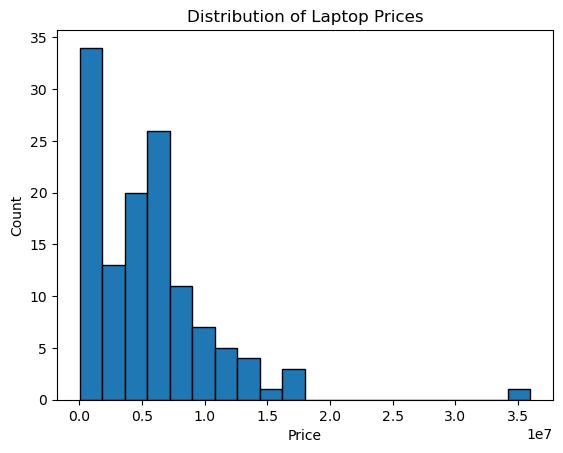

In [720]:
plt.hist(laptops_encoded["Price"], bins=20, edgecolor="black")
plt.xlabel("Price")
plt.ylabel("Count")
plt.title("Distribution of Laptop Prices")
plt.show()

In [721]:
price_mean = laptops["Price"].mean()
laptops["Price"] = laptops["Price"].fillna(price_mean)

In [722]:
laptops

,Price,cleaned_RAM,storage_in_GB,Family_Core i3,Family_Ryzen 3,Intel_core_i3,Intel_core_i5,Intel_core_i7,AMD_Ryzen_3,AMD_Ryzen_5,...,Qualcomm,laptop_Brand_Asus,laptop_Brand_Dell,laptop_Brand_Hp,laptop_Brand_Lenovo,laptop_Brand_Msi,laptop_Brand_Other,laptop_Brand_Pixelartz,laptop_Brand_Samsung,laptop_Brand_Vatsin
1,4299900.0,15,512.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,49500.0,15,512.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,4149900.0,15,512.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9,9999900.0,16,512.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
12,29900.0,15,512.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,6599900.0,16,512.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
285,3375000.0,15,512.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
291,8449900.0,16,1024.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
293,11399000.0,16,1024.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [723]:
corr_matrix = laptops.corr()

In [724]:
corr_matrix["Price"].sort_values(ascending=False)

Price                     1.000000
storage_in_GB             0.676031
cleaned_RAM               0.497986
laptop_Brand_Samsung      0.280875
laptop_Brand_Hp           0.233869
Intel_core_i7             0.196549
laptop_Brand_Asus         0.180649
Qualcomm                  0.137189
laptop_Brand_Msi          0.117918
AMD_Ryzen_7               0.108175
laptop_Brand_Dell         0.107298
AMD_Ryzen_9               0.082089
AMD_Ryzen_5              -0.014243
Intel_core_i3            -0.056938
Family_Core i3           -0.056938
laptop_Brand_Lenovo      -0.060316
AMD_Ryzen_3              -0.066114
Family_Ryzen 3           -0.066114
Intel_core_i5            -0.154761
laptop_Brand_Other       -0.244653
laptop_Brand_Vatsin      -0.327691
laptop_Brand_Pixelartz   -0.376025
Name: Price, dtype: float64

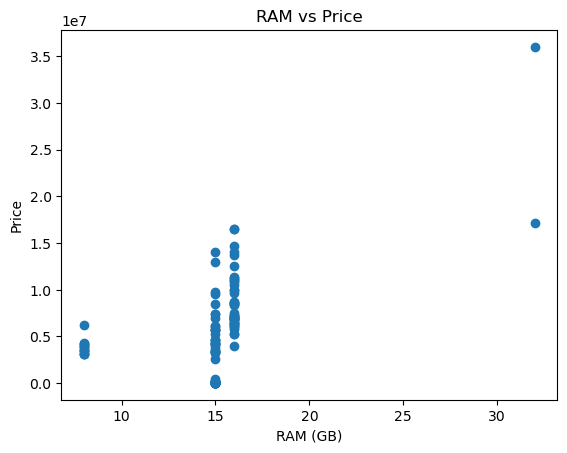

In [725]:
plt.scatter(laptops["cleaned_RAM"], laptops["Price"])
plt.xlabel("RAM (GB)")
plt.ylabel("Price")
plt.title("RAM vs Price")
plt.show()


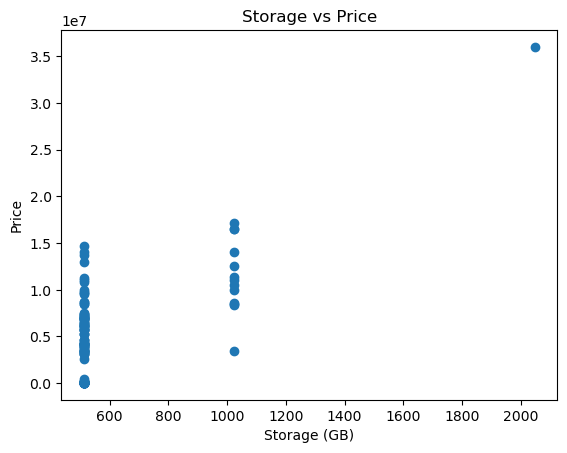

In [726]:
plt.scatter(laptops["storage_in_GB"], laptops["Price"])
plt.xlabel("Storage (GB)")
plt.ylabel("Price")
plt.title("Storage vs Price")
plt.show()


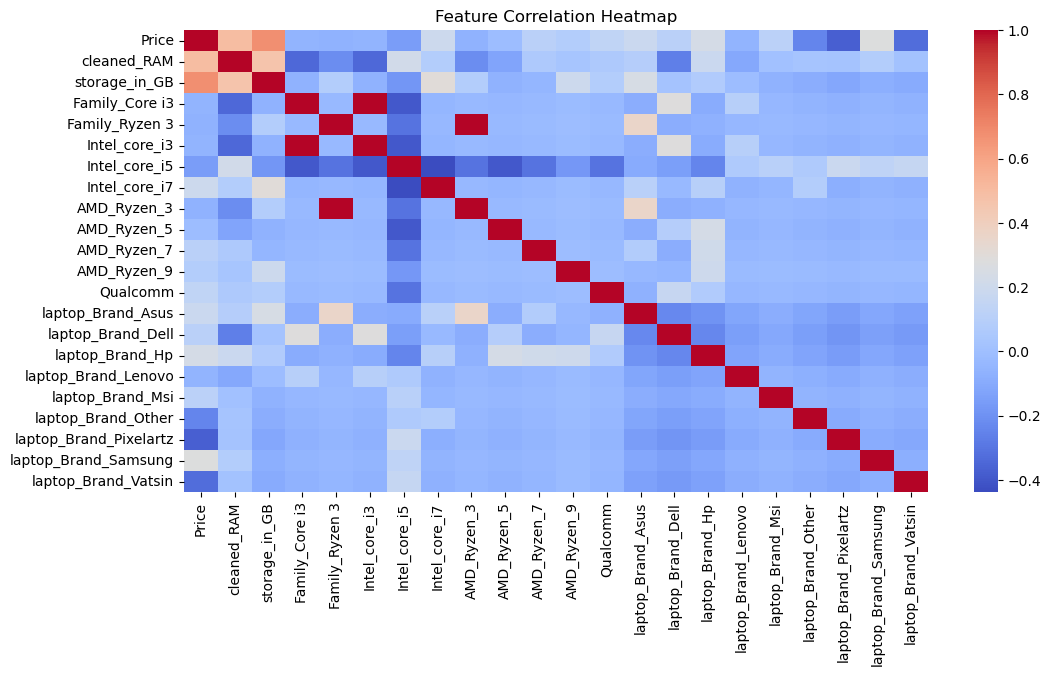

In [727]:
import seaborn as sns

plt.figure(figsize=(12,6))
sns.heatmap(laptops.corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()


In [730]:
laptops

,Price,cleaned_RAM,storage_in_GB,Family_Core i3,Family_Ryzen 3,Intel_core_i3,Intel_core_i5,Intel_core_i7,AMD_Ryzen_3,AMD_Ryzen_5,...,Qualcomm,laptop_Brand_Asus,laptop_Brand_Dell,laptop_Brand_Hp,laptop_Brand_Lenovo,laptop_Brand_Msi,laptop_Brand_Other,laptop_Brand_Pixelartz,laptop_Brand_Samsung,laptop_Brand_Vatsin
1,4299900.0,15,512.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,49500.0,15,512.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,4149900.0,15,512.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9,9999900.0,16,512.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
12,29900.0,15,512.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,6599900.0,16,512.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
285,3375000.0,15,512.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
291,8449900.0,16,1024.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
293,11399000.0,16,1024.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [746]:
laptops['storage_in_GB'] = laptops['storage_in_GB'] / 512
laptops

,Price,cleaned_RAM,storage_in_GB,Family_Core i3,Family_Ryzen 3,Intel_core_i3,Intel_core_i5,Intel_core_i7,AMD_Ryzen_3,AMD_Ryzen_5,...,Qualcomm,laptop_Brand_Asus,laptop_Brand_Dell,laptop_Brand_Hp,laptop_Brand_Lenovo,laptop_Brand_Msi,laptop_Brand_Other,laptop_Brand_Pixelartz,laptop_Brand_Samsung,laptop_Brand_Vatsin
1,4299900.0,15,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,49500.0,15,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,4149900.0,15,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9,9999900.0,16,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
12,29900.0,15,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,6599900.0,16,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
285,3375000.0,15,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
291,8449900.0,16,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
293,11399000.0,16,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X = laptops.drop('Price',axis = 1)
Y = laptops['Price']

In [760]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

In [791]:
from sklearn.linear_model import LinearRegression,LassoCV,RidgeCV
lin_reg = LinearRegression()
lasso_cv = LassoCV(cv = 3)
ridge_cv = RidgeCV()
# lin_reg.fit(X_train,y_train)
lasso_cv.fit(X_train,y_train)
# ridge_cv.fit(X_train,y_train)
y_pred = lasso_cv.predict(X_test)

In [792]:
from sklearn.metrics import root_mean_squared_error
lin_rmse = root_mean_squared_error(y_test,y_pred)
lin_rmse

3118303.40932222

In [813]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=50,random_state=42,max_depth=10)
forest_reg.fit(X_train,y_train)
forest_pred_y = forest_reg.predict(X_test)


In [814]:
from sklearn.metrics import root_mean_squared_error
forest_rmse = root_mean_squared_error(y_test,forest_pred_y)
forest_rmse

6148942.989566585

In [817]:
from sklearn.tree import DecisionTreeRegressor

decision_reg = DecisionTreeRegressor(random_state=42,max_depth=5)
decision_reg.fit(X_train,y_train)
decision_pred_y = decision_reg.predict(X_test)

In [818]:
from sklearn.metrics import root_mean_squared_error
decision_rmse = root_mean_squared_error(y_test,decision_pred_y)
decision_rmse

5392353.023634918

In [799]:
from sklearn.tree import ExtraTreeRegressor

extra_reg = ExtraTreeRegressor(random_state=42,max_depth=3)
extra_reg.fit(X_train,y_train)
extra_pred = extra_reg.predict(X_test)

In [800]:
from sklearn.metrics import root_mean_squared_error
extra_rmse = root_mean_squared_error(y_test,extra_pred)
extra_rmse

5540714.502764227

In [785]:
from sklearn.svm import SVR

svr_reg = SVR(C = 0.5)
svr_reg.fit(X_train,y_train)
svr_pred = svr_reg.predict(X_test)

In [786]:
from sklearn.metrics import root_mean_squared_error
svr_rmse = root_mean_squared_error(y_test,svr_pred)
svr_rmse

9443754.93790697

In [830]:
from sklearn.linear_model import ElasticNetCV

elastic_cv = ElasticNetCV(l1_ratio = 1, cv = 3)

elastic_cv.fit(X_train,y_train)
y_pred = elastic_cv.predict(X_test)

In [831]:
from sklearn.metrics import root_mean_squared_error
elastic_rmse = root_mean_squared_error(y_test,y_pred)
elastic_rmse

3118303.40932222